In [2]:
import nhsdata
import numpy as np
import importlib
#importlib.reload(nhsdata)

In [ ]:
month_names = np.array(["January", "February","March", "April","May", "June", "July",
          "August", "September", "October", "November", "December"])

def convMonthly(date):
    month, year = date.split(" ")
    year = float(year)
    month = np.where(month_names == month)[0][0] + 1
    return year + month/12
    
def convWeekly(date):
    _,_,date = date.split(" ")
    day, month, year = date.split("/")
    return int(year) + (int(month)-1)/12 + int(day)/365

In [ ]:
page_names = nhsdata.getAnEpages(verbose = 10)
xls_file_names = nhsdata.get_xls_files(page_names, verbose = 10)
data = nhsdata.check_files(xls_file_names, verbose = 10)
allNames = nhsdata.get_all_names(data[0], verbose = 0)

attendences_t1, over4hours_t1, periods_t1 = nhsdata.collectType1Data(data, allNames, verbose = 0)

In [11]:
dates = []

for date in periods_t1:
    if "Week" in date:
        dates.append(convWeekly(date))
    else:
        dates.append(convMonthly(date))

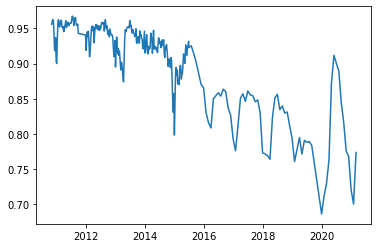

In [12]:
import matplotlib.pyplot as plt
plt.plot(dates, over4hours_t1[0])

In [13]:
np.save("type1_post2010.npy", [allNames, dates, over4hours_t1])